# Bike Sharing Assighnment

#### Problem Statement:
A bike sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

#### Company Requirements:
                - To Which Variables are significant in predicting the demand for shared bikes.
                - How well those varaibles describe the bike demands

#### I would be using Multiple Linear Regression model for analysis.

### Data Dictionary

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# STEP 1 : Reading and Understanding the Data

In [1]:
# To import all necessary packages for analysis

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

#Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading the file into bikes
bikes = pd.read_csv("https://raw.githubusercontent.com/vivekmoningi/Bike-Sharing-Assighnment/main/day.csv")

In [3]:
# checking the values in the file
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking shape of the data like no of rows and columns
bikes.shape

(730, 16)

In [5]:
# checking info of the data
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values in the data as the number of rows are 730 and we can see every column have 730 columns

In [6]:
# To check summary statistics of the data
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# to check duplicates in the values

bikes.duplicated().value_counts()

False    730
dtype: int64

In [8]:
#Calculating the percentage of missing values in bikes

((bikes.isnull().sum()/len(bikes))*100).sort_values(ascending = False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

From the above we can infer that we dont have any duplicate values in the data

# STEP 2: Data Preparation and Visualizing Data
To prepare the data where necessary values are changed as intended and Visualizing the Data for doing some EDA

In [9]:
# to check the date format
bikes['dteday'].value_counts()

29-05-2019    1
24-09-2018    1
29-09-2019    1
11-03-2019    1
12-02-2018    1
             ..
30-04-2019    1
16-08-2018    1
26-02-2018    1
14-04-2018    1
22-05-2019    1
Name: dteday, Length: 730, dtype: int64

In [10]:
# to convert the dteday into date

bikes['dteday'] = pd.to_datetime(bikes['dteday'])

In [11]:
bikes['dteday']

0     2018-01-01
1     2018-02-01
2     2018-03-01
3     2018-04-01
4     2018-05-01
         ...    
725   2019-12-27
726   2019-12-28
727   2019-12-29
728   2019-12-30
729   2019-12-31
Name: dteday, Length: 730, dtype: datetime64[ns]

In [12]:
# checking values in the columns

bikes['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [13]:
bikes['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [14]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
bikes['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [16]:
bikes['holiday'].unique()

array([0, 1], dtype=int64)

In [17]:
bikes['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [18]:
# to replace categorical variables for facilitating dummy variable creation
var = ['weathersit']

bikes[var] = bikes[var].apply(lambda x: x.map({1:'Clear',2:'Mist',3:'Snow',4:'Rain'}))

In [19]:
var = ['season']

bikes[var] = bikes[var].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

In [20]:
var = ['workingday']

bikes[var] = bikes[var].apply(lambda x: x.map({0:'weekend or holiday', 1:'weekday'}))

In [21]:
var = ['holiday']

bikes[var] = bikes[var].apply(lambda x: x.map({0:'normal day', 1:'holiday'}))

In [22]:
# to combine both holiday and workingday columns and create a derived column
def total(wd):
    if wd['holiday'] == 'holiday':
        return 'PH'
    elif (wd['holiday'] == 'normal day') and (wd['workingday'] == 'weekend or holiday'):
        return 'WE'
    return 'WD'

bikes['day_type'] = bikes.apply(total, axis=1 )

In [23]:
bikes['day_type'].value_counts()

WD    499
WE    210
PH     21
Name: day_type, dtype: int64

In [24]:
day_columns = ['workingday','holiday']

bikes_data = bikes.copy()
bikes_data = bikes_data.drop(day_columns,axis=1)

removing columns instant as it is index column, dateday as we have year, month and weekday column for slicing data, registered and casual as the sum is count which is cnt column

In [25]:
# dropping unwanted columns like dateday,instant, registered, casual
bikes_data = bikes_data.drop(['instant','dteday','registered','casual'],axis=1)

In [26]:
bikes_data.head()

,season,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,cnt,day_type
0,spring,0,1,6,Mist,14.110847,18.18125,80.5833,10.749882,985,WE
1,spring,0,1,0,Mist,14.902598,17.68695,69.6087,16.652113,801,WE
2,spring,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,WD
3,spring,0,1,2,Clear,8.200000,10.60610,59.0435,10.739832,1562,WD
4,spring,0,1,3,Clear,9.305237,11.46350,43.6957,12.522300,1600,WD


### Visualizing Data

In [ ]:
bikes_data['temp'].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

<AxesSubplot:xlabel='temp'>

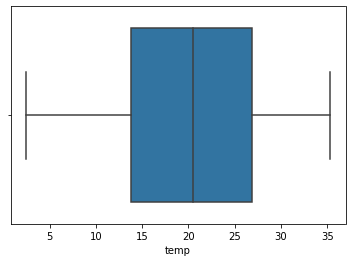

In [ ]:
sns.boxplot(x='temp',data=bikes_data)

In [ ]:
bikes_data['atemp'].describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

<AxesSubplot:xlabel='atemp'>

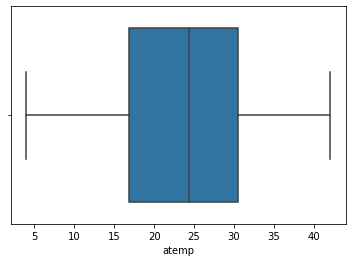

In [ ]:
sns.boxplot(x='atemp',data=bikes_data)

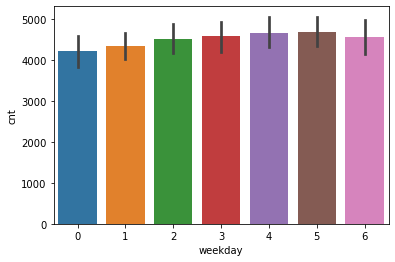

In [27]:
# Bi Variate Analysis on Weekday Count
sns.barplot(x='weekday',y='cnt',data=bikes_data,estimator=np.mean)
plt.show()

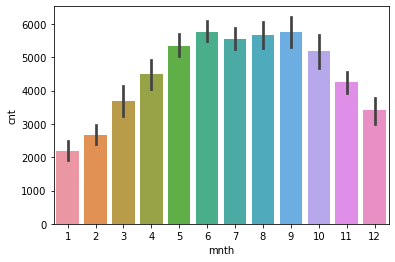

In [ ]:
sns.barplot(x='mnth',y='cnt',data=bikes_data,estimator=np.mean)
plt.show()

<Figure size 720x576 with 0 Axes>

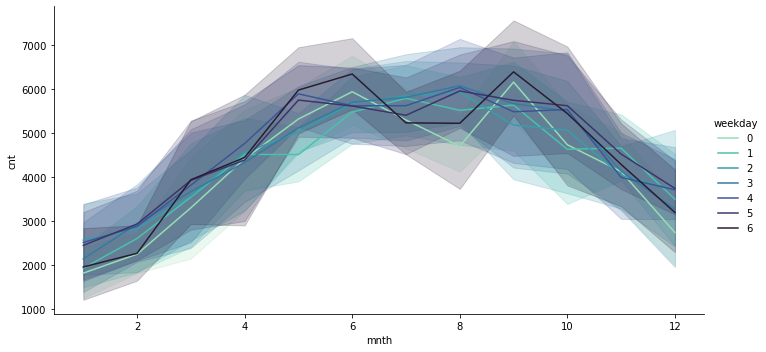

In [122]:
# To check trend on the month
palette = sns.color_palette("mako_r", 7)
plt.figure(figsize=(10,8))
sns.relplot(x ='mnth',y ='cnt',data=bikes_data,palette=palette,kind="line",height=5,aspect=2,hue= 'weekday')
plt.show()

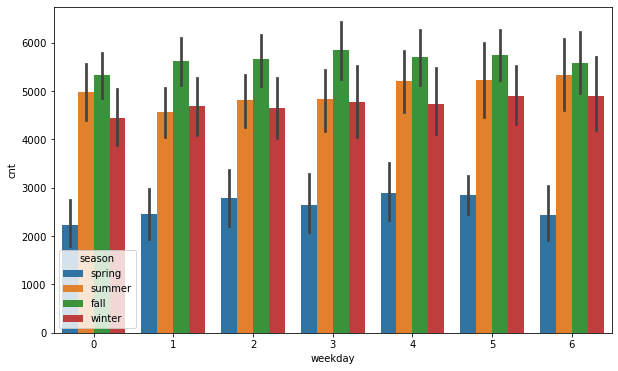

In [28]:
plt.figure(figsize= (10,6))
sns.barplot(x='weekday',y='cnt',hue='season',data=bikes_data,estimator=np.mean)
plt.show()

The number of bikes are rented more on Saturday as per the above graph in General. If we see as per season the counts changes for example in summer people rent on saturday more where as in fall people rent on thursday.

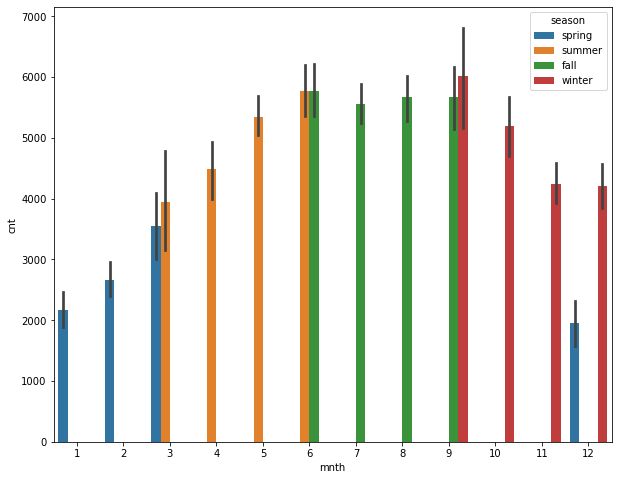

In [34]:
plt.figure(figsize= (10,8))
palette = {"spring":"C0","summer":"C1","fall":"C2","winter":"C3"}
sns.barplot(x='mnth',y='cnt',hue='season',data=bikes_data,estimator=np.mean,palette=palette)
plt.show()

As per the above graph we can analyse for each season there is a increase in the count like for spring the cnt is max in march where as for fall and summer max is in June and winter the cnt is max in sept.

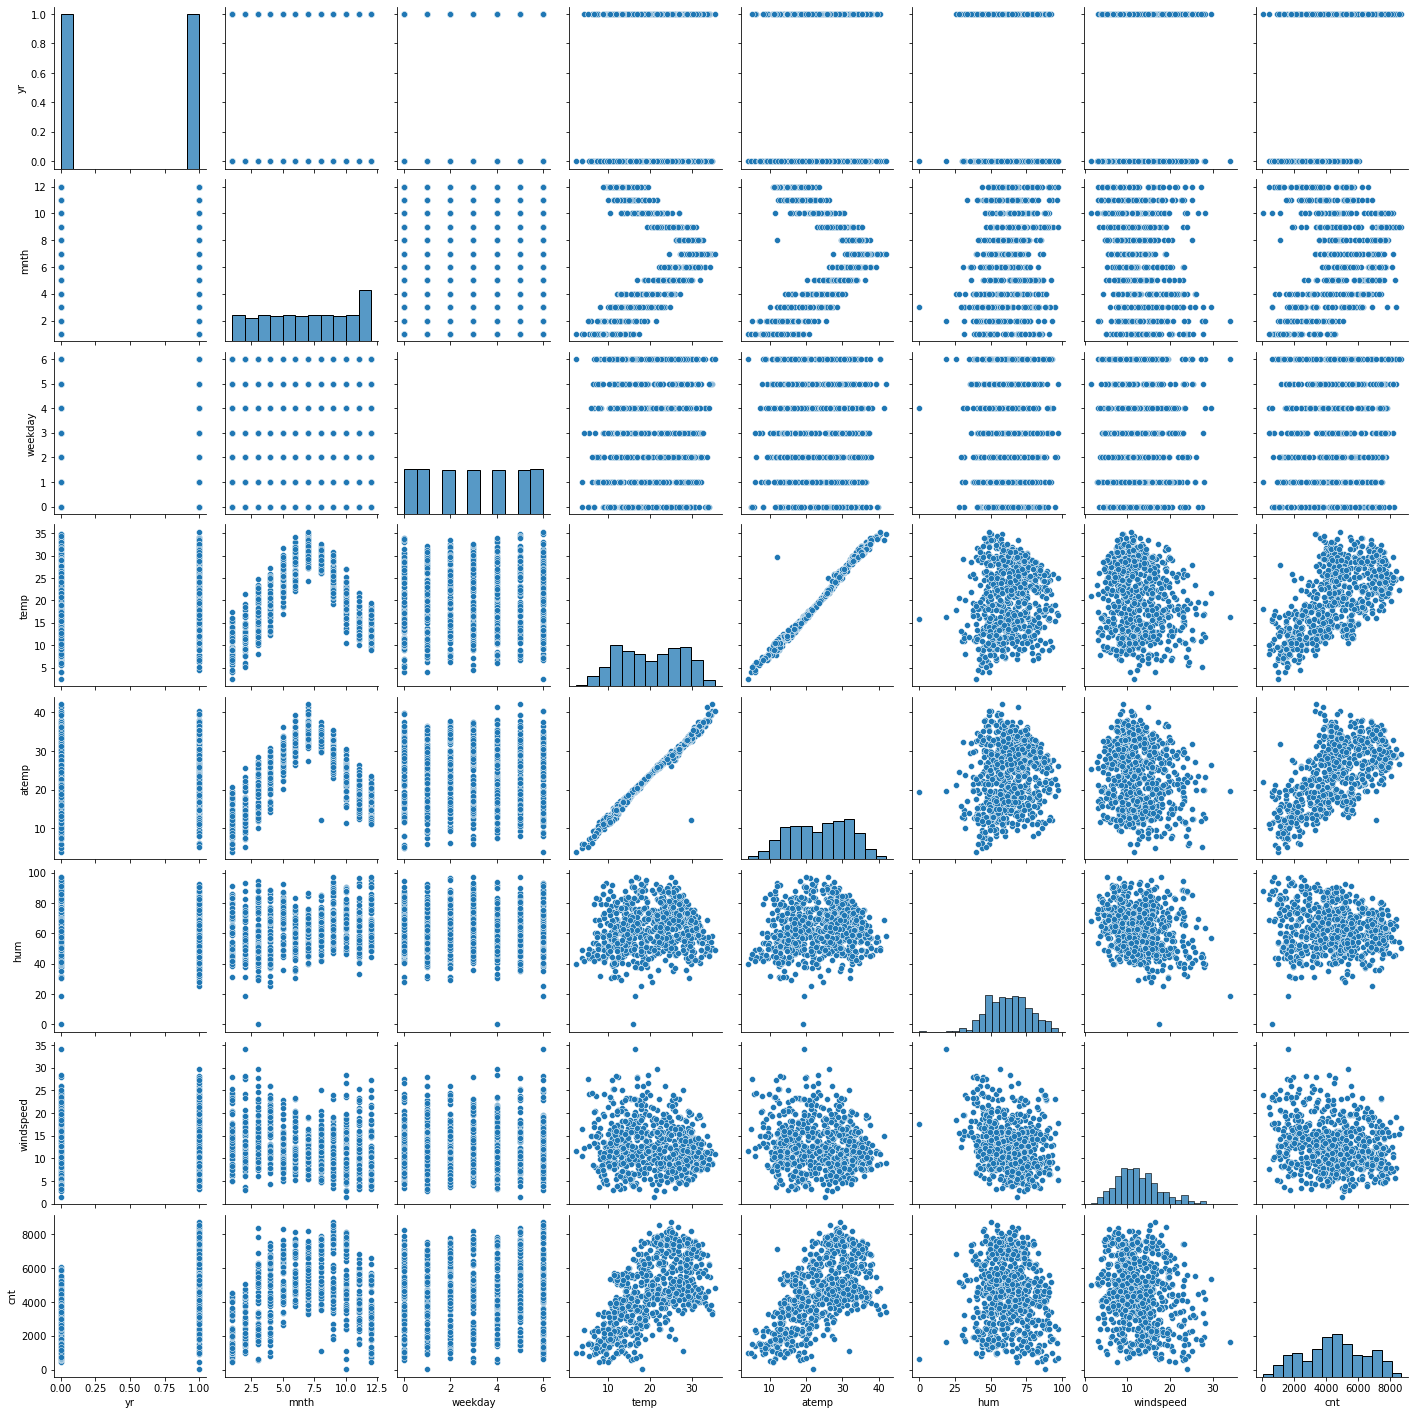

In [35]:
sns.pairplot(bikes_data)
plt.show()

In [36]:
bikes_data.columns

Index(['season', 'yr', 'mnth', 'weekday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'day_type'],
      dtype='object')

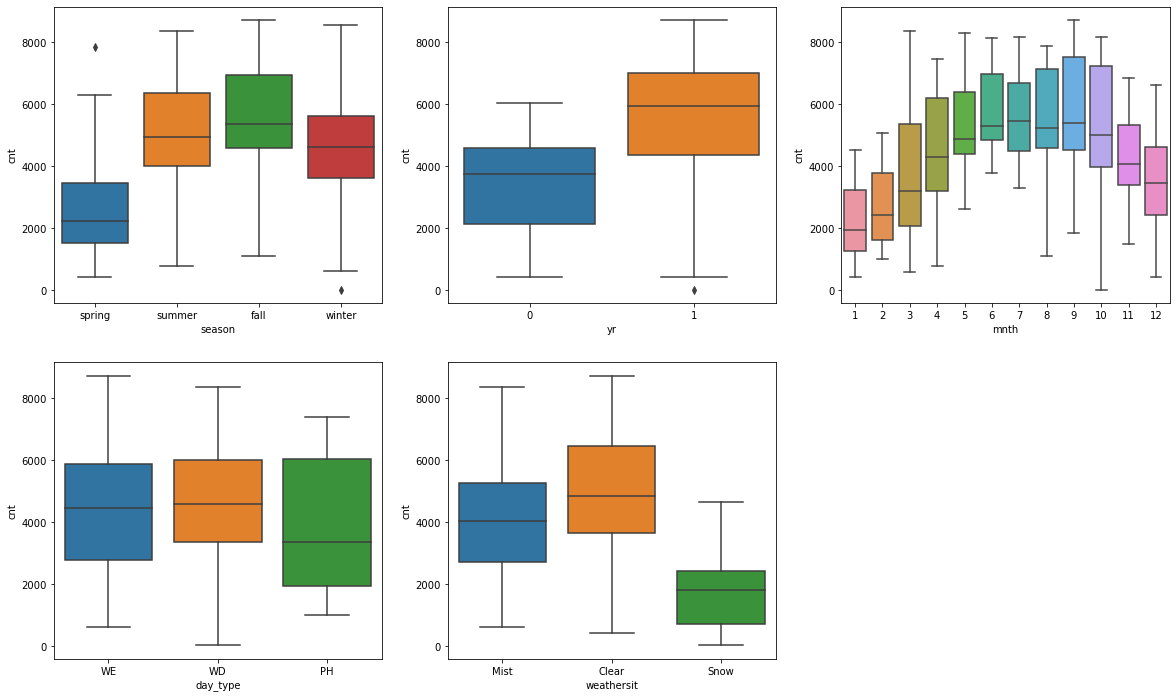

In [37]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'day_type', y = 'cnt', data = bikes_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_data)
plt.show()

### Dummy Variables

The below categorical variables which can be converted into dummy variables are 
1. day_type = 3 level
2. weathersit = 3 levels (has 4 levels but current dataset has only 3 levels)
3. season = 4 levels

In [38]:
# Getting the dummy variables and storing it in a new variable 

day_type_dummy = pd.get_dummies(bikes_data['day_type'])
weathersit_dummy = pd.get_dummies(bikes_data['weathersit'])
season_dummy = pd.get_dummies(bikes_data['season'])

In [39]:
day_type_dummy.head()

,PH,WD,WE
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0


In [40]:
day_type_dummy.value_counts()

PH  WD  WE
0   1   0     499
    0   1     210
1   0   0      21
dtype: int64

In [41]:
# dropping the first column to keep n-1 levels
day_type_dummy = pd.get_dummies(bikes_data['day_type'],drop_first=True)
day_type_dummy = day_type_dummy.astype('int64')

In [42]:
weathersit_dummy.head()

,Clear,Mist,Snow
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [43]:
weathersit_dummy.value_counts()

Clear  Mist  Snow
1      0     0       463
0      1     0       246
       0     1        21
dtype: int64

In [44]:
# dropping the first column to keep n-1 levels
weathersit_dummy = pd.get_dummies(bikes_data['weathersit'],drop_first=True)
weathersit_dummy = weathersit_dummy.astype('int64')

In [45]:
season_dummy.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [46]:
season_dummy.value_counts()

fall  spring  summer  winter
1     0       0       0         188
0     0       1       0         184
      1       0       0         180
      0       0       1         178
dtype: int64

In [47]:
# dropping the first column to keep n-1 levels
season_dummy = pd.get_dummies(bikes_data['season'],drop_first=True)
season_dummy = season_dummy.astype('int64')

In [48]:
#concatining dummy variables with bikes data

bikes_data = pd.concat([bikes_data,season_dummy,day_type_dummy,weathersit_dummy],axis=1)

In [49]:
bikes_data.head()

,season,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,cnt,day_type,spring,summer,winter,WD,WE,Mist,Snow
0,spring,0,1,6,Mist,14.110847,18.18125,80.5833,10.749882,985,WE,1,0,0,0,1,1,0
1,spring,0,1,0,Mist,14.902598,17.68695,69.6087,16.652113,801,WE,1,0,0,0,1,1,0
2,spring,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,WD,1,0,0,1,0,0,0
3,spring,0,1,2,Clear,8.200000,10.60610,59.0435,10.739832,1562,WD,1,0,0,1,0,0,0
4,spring,0,1,3,Clear,9.305237,11.46350,43.6957,12.522300,1600,WD,1,0,0,1,0,0,0


In [50]:
# dropping columns which has dummy variables

bikes_data.drop(['day_type','season','weathersit'],axis=1,inplace=True)

In [51]:
bikes_data.head()

,yr,mnth,weekday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,WD,WE,Mist,Snow
0,0,1,6,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,1,0
1,0,1,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,1,0
2,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0
3,0,1,2,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0,0
4,0,1,3,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0,0


In [52]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yr         730 non-null    int64  
 1   mnth       730 non-null    int64  
 2   weekday    730 non-null    int64  
 3   temp       730 non-null    float64
 4   atemp      730 non-null    float64
 5   hum        730 non-null    float64
 6   windspeed  730 non-null    float64
 7   cnt        730 non-null    int64  
 8   spring     730 non-null    int64  
 9   summer     730 non-null    int64  
 10  winter     730 non-null    int64  
 11  WD         730 non-null    int64  
 12  WE         730 non-null    int64  
 13  Mist       730 non-null    int64  
 14  Snow       730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


### Splitting the Data into Training and Testing Sets

As want to first our model to get trainend then once it is trained we want to test on the model so we are splitting the data into 70 and 30 proportions

In [53]:
#importing necessary libraries to split the data into test and train
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows
np.random.seed(0)
train_data,test_data = train_test_split(bikes_data,train_size=0.7,test_size=0.3,random_state=100)

In [54]:
# checking the dataset sizes respectively
print(train_data.shape)
print(test_data.shape)

(510, 15)
(219, 15)


### Scalling the data

As we learnt previously that we will scaling the data to get them into single type in other terms represent them as similar axis with other numeric variables which will help in effective prediction.

I will be using MinMaxScaler in which the number are scaled between 0 and 1.

In [55]:
#importing MinMaxscalar for processing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [56]:
# applying scalar column to numeric variables like temp,atemp,hum, windspeed,cnt

scalar_variables = ['temp','atemp','hum','windspeed','cnt']

train_data[scalar_variables] = scaler.fit_transform(train_data[scalar_variables])

In [57]:
train_data.head()

,yr,mnth,weekday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,WD,WE,Mist,Snow
653,1,10,2,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,0,0
576,1,7,2,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,0,0
426,1,3,6,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,1,0
728,1,12,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0
482,1,4,6,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,1,0


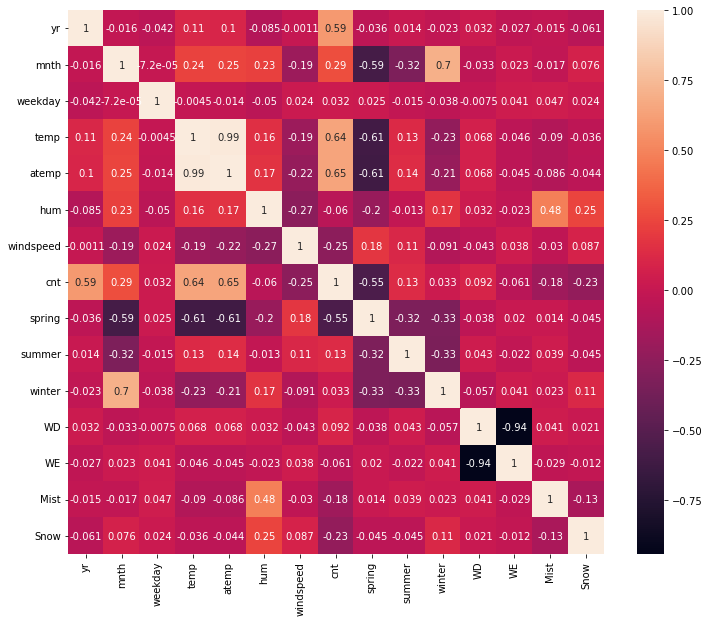

In [58]:
#checking the correlation coefficients

plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

As we can see the count is highly correlated with atemp,temp lets start our analysis with them

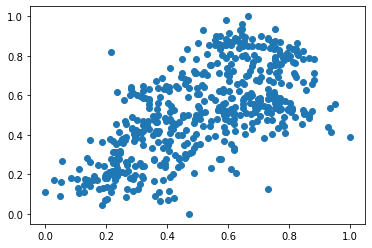

In [59]:
# to understand the relationship better and to check if we can proceed further that we can fit a regression line.
#Creating a scatter plot

plt.scatter(train_data.atemp,train_data.cnt)
plt.show()

In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yr         510 non-null    int64  
 1   mnth       510 non-null    int64  
 2   weekday    510 non-null    int64  
 3   temp       510 non-null    float64
 4   atemp      510 non-null    float64
 5   hum        510 non-null    float64
 6   windspeed  510 non-null    float64
 7   cnt        510 non-null    float64
 8   spring     510 non-null    int64  
 9   summer     510 non-null    int64  
 10  winter     510 non-null    int64  
 11  WD         510 non-null    int64  
 12  WE         510 non-null    int64  
 13  Mist       510 non-null    int64  
 14  Snow       510 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 63.8 KB


In [61]:
# Lets start analysis with atemp and slowly we can start adding more variables

#Diving data into further more sets for bulding the model

y_train = train_data.pop('cnt')
X_train = train_data

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yr         510 non-null    int64  
 1   mnth       510 non-null    int64  
 2   weekday    510 non-null    int64  
 3   temp       510 non-null    float64
 4   atemp      510 non-null    float64
 5   hum        510 non-null    float64
 6   windspeed  510 non-null    float64
 7   spring     510 non-null    int64  
 8   summer     510 non-null    int64  
 9   winter     510 non-null    int64  
 10  WD         510 non-null    int64  
 11  WE         510 non-null    int64  
 12  Mist       510 non-null    int64  
 13  Snow       510 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 59.8 KB


### Building a linear Model

We will be using statsmodel as the summary of the stats is quite detailed which will help us in understanding the metrics clearly.

In [63]:
import statsmodels.api as sm

# adding a constant is very important as per the linera regression model if not the model will compute a line by passing through the origin
X_train_model = sm.add_constant(X_train['atemp'])

#Creating the model
mdl = sm.OLS(y_train,X_train_model).fit()

In [64]:
#checking the summary

print(mdl.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           1.10e-61
Time:                        22:08:44   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

The R square of the model with one varaible is 0.418 which is ok can be made better as per our understanding the R square value will increase or remain constant so, lets start adding further more variables

In [65]:
# adding another variable to the model

X_train_model = X_train[['atemp','temp']]

X_train_model = sm.add_constant(X_train_model)

#Creating the model
mdl = sm.OLS(y_train,X_train_model).fit()

print(mdl.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           1.95e-60
Time:                        22:08:44   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.0

Adding temp didn't made any significant so, lets check the summary by adding other values

In [66]:
# adding another variable to the model

X_train_model = X_train[['atemp','temp','yr']]

X_train_model = sm.add_constant(X_train_model)

#Creating the model
mdl = sm.OLS(y_train,X_train_model).fit()

print(mdl.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     385.8
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          2.62e-130
Time:                        22:08:44   Log-Likelihood:                 341.97
No. Observations:                 510   AIC:                            -675.9
Df Residuals:                     506   BIC:                            -659.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0724      0.015      4.820      0.0

Adding Yr have made a significant shift in the R - square which has increased from 41% to 70%

In [67]:
# building a linear model

X_train_model = sm.add_constant(X_train)

#Creating the model
mdl_1 = sm.OLS(y_train.astype(float),X_train_model.astype(float)).fit()

print(mdl_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.69e-182
Time:                        22:08:44   Log-Likelihood:                 496.00
No. Observations:                 510   AIC:                            -962.0
Df Residuals:                     495   BIC:                            -898.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1748      0.047      3.758      0.0

By considering all variables we can see that the R-Squared is 0.834 which we can say that the model is a good model. As a next step to build better model lets consider VIF which is Varinace Influence Factor.

In [68]:
# importing libraries to calculate the VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# defining the VIF function as we need it to use several times as part of our analysis
def VIF(data_table):
    vif = pd.DataFrame()
    vif['Features'] = data_table.columns
    vif['VIF'] = [variance_inflation_factor(data_table.values, i) for i in range(data_table.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [70]:
VIF(X_train)

,Features,VIF
3,temp,379.34
4,atemp,366.22
5,hum,33.42
10,WD,19.73
1,mnth,15.86
11,WE,9.29
6,windspeed,5.23
7,spring,5.11
9,winter,4.82
2,weekday,3.27


Generally the VIF should be less than 5 so, there are few columns we can drop but instead of dropping all the columns at once we can drop one column at a time and building the model

Just only considering VIF is wrong so we need to check both p value and VIF for dropping a column


In [71]:
# as the atemp p value is quite significant and VIF is also more than 5 so will drop the column and analyse the model
X_train_new = X_train.drop('atemp',axis=1)

In [72]:
# Building the model with new dataset

X_train_model = sm.add_constant(X_train_new)

#Creating the model
mdl_2 = sm.OLS(y_train,X_train_model).fit()

print(mdl_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.2
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.31e-183
Time:                        22:08:44   Log-Likelihood:                 495.91
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     496   BIC:                            -904.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1741      0.046      3.749      0.0

Rechecking VIF if it is adjusted or still it is same

In [73]:
VIF(X_train_new)

,Features,VIF
4,hum,33.38
9,WD,19.71
3,temp,19.07
1,mnth,15.86
10,WE,9.28
6,spring,5.05
5,windspeed,5.00
8,winter,4.69
2,weekday,3.26
7,summer,2.81


The VIF numbers have reduced to greated extent but the values are still high so, lets repeat the same process again.

In [74]:
# as the mnth p value is quite significant and VIF is also more than 5 so will drop the column and analyse the model
X_train_new = X_train_new.drop('mnth',axis=1)

In [75]:
# Building the model with new dataset

X_train_model = sm.add_constant(X_train_new)

#Creating the model
mdl_3 = sm.OLS(y_train,X_train_model).fit()

print(mdl_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.00e-184
Time:                        22:08:44   Log-Likelihood:                 495.78
No. Observations:                 510   AIC:                            -965.6
Df Residuals:                     497   BIC:                            -910.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1817      0.044      4.154      0.0

In [76]:
VIF(X_train_new)

,Features,VIF
3,hum,31.00
8,WD,19.10
2,temp,18.16
9,WE,8.99
4,windspeed,4.90
5,spring,4.47
7,winter,3.37
1,weekday,3.23
6,summer,2.43
10,Mist,2.30


In [77]:
# I would be dropping hum as the VIF is quiet high when compared to others

X_train_new = X_train_new.drop('hum',axis=1)

In [78]:
# Building the model with new dataset

X_train_model = sm.add_constant(X_train_new)

#Creating the model
mdl_4 = sm.OLS(y_train,X_train_model).fit()

print(mdl_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          9.96e-184
Time:                        22:08:45   Log-Likelihood:                 490.61
No. Observations:                 510   AIC:                            -957.2
Df Residuals:                     498   BIC:                            -906.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1171      0.039      2.992      0.0

In [79]:
VIF(X_train_new)

,Features,VIF
7,WD,16.71
2,temp,11.91
8,WE,7.92
3,windspeed,4.76
4,spring,3.59
1,weekday,3.23
6,winter,2.53
5,summer,2.22
0,yr,2.07
9,Mist,1.57


In [80]:
X_train_new = X_train_new.drop('WD',1)

In [81]:
# Building the model with new dataset

X_train_model = sm.add_constant(X_train_new)

#Creating the model
mdl_5 = sm.OLS(y_train,X_train_model).fit()

print(mdl_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          7.54e-183
Time:                        22:08:45   Log-Likelihood:                 485.69
No. Observations:                 510   AIC:                            -949.4
Df Residuals:                     499   BIC:                            -902.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1948      0.030      6.408      0.0

In [82]:
VIF(X_train_new)

,Features,VIF
3,windspeed,4.64
2,temp,4.42
1,weekday,3.09
4,spring,2.13
0,yr,2.07
5,summer,1.82
6,winter,1.70
8,Mist,1.54
7,WE,1.43
9,Snow,1.08


As the value of VIF are below 5 and R-square is 0.827 which is quite good I would be testing this model.

### Residual Analysis

To check if the majority of our distributed towards mean 0

In [83]:
y_train_cnt = mdl_5.predict(X_train_model)

In [84]:
res = y_train - y_train_cnt
res

653    0.145318
576    0.037907
426   -0.012723
728   -0.138906
482   -0.105946
         ...   
526    0.031086
578   -0.010661
53    -0.000141
350    0.028593
79    -0.064102
Length: 510, dtype: float64

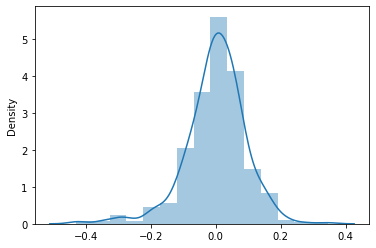

In [85]:
sns.distplot(res,bins = 15)
plt.show()

As per the above residual analysis we can see that the values of residual are in middle of mean 0.

### Making predictions uisng the Final Model

Apply scaling on the test set as well

In [86]:
scalar_variables = ['temp','atemp','hum','windspeed','cnt']

test_data[scalar_variables] = scaler.transform(test_data[scalar_variables])

In [87]:
test_data.describe()

,yr,mnth,weekday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,WD,WE,Mist,Snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,6.474886,3.018265,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.698630,0.264840,0.319635,0.027397
std,0.500722,3.421875,1.988415,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.459904,0.442259,0.467403,0.163612
min,0.000000,1.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,1.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,3.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,5.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,12.000000,6.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
# Diving the dataset into test_data_1 and Test_data
test_data_1 = test_data.pop('cnt')
Test_data = test_data


In [89]:
# Adding a constant
Test_data_sm = sm.add_constant(Test_data)
Test_data_sm.head()

,const,yr,mnth,weekday,temp,atemp,hum,windspeed,spring,summer,winter,WD,WE,Mist,Snow
184,1.0,0,7,1,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,1,0
535,1.0,1,6,3,0.901354,0.842587,0.610133,0.153728,0,1,0,1,0,0,0
299,1.0,0,10,4,0.511964,0.496145,0.837699,0.334206,0,0,1,1,0,1,0
221,1.0,0,8,3,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0,0,0
152,1.0,0,6,4,0.817246,0.741471,0.314298,0.537414,0,1,0,1,0,0,0


In [90]:
# dropping the columns which we dropped while building a model

Test_data_sm = Test_data_sm.drop(["atemp","hum","mnth","WD"], axis=1)

In [91]:
test_data_pred = mdl_5.predict(Test_data_sm)

In [92]:
test_data_pred

184    0.503457
535    0.897079
299    0.420271
221    0.583051
152    0.571293
         ...   
400    0.330201
702    0.726039
127    0.482331
640    0.800248
72     0.245509
Length: 219, dtype: float64

In [93]:
# To check the r-score of the analysis importing necessary package

from sklearn.metrics import r2_score

### R-Score Analysis of Predicted Model

In [94]:
print(round(r2_score(y_true=test_data_1,y_pred=test_data_pred ),3))

0.802


The Predicted R-Score is 0.802 which means the model is good. Plotting graph to understand the spread

### Model Equation and Plotting of Predicted Model

Text(0, 0.5, 'y_pred')

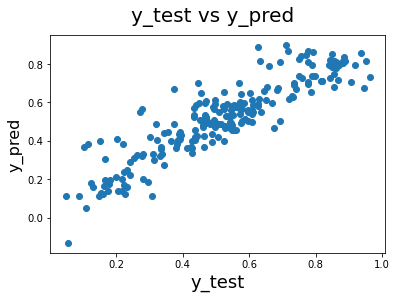

In [95]:
fig = plt.figure()
plt.scatter(test_data_1, test_data_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

### The equation of our current predicted model:

### *cnt* = *0.2355 X yr* + *0.0093 X weekday* + *0.4691 X temp* + *(-0.1569) X windspeed* + *(-0.0822) X spring* + *0.0401 X summer* + *0.0780 X    winter* + *(-0.0159) X WE* + *(-0.0776) X Mist* + *(-0.2804) X Snow* + *0.1948*